In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url,names=['slength','swidth','plength','pwidth','species'])

In [4]:
df.describe()

,slength,swidth,plength,pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
df.skew(numeric_only=True)

slength    0.314911
swidth     0.334053
plength   -0.274464
pwidth    -0.104997
dtype: float64

In [6]:
stats.kurtosis(df[['slength','swidth','plength','pwidth']] )

array([-0.57356795,  0.2414433 , -1.3953593 , -1.33524564])

In [7]:
df.corr(numeric_only=True)

,slength,swidth,plength,pwidth
slength,1.000000,-0.109369,0.871754,0.817954
swidth,-0.109369,1.000000,-0.420516,-0.356544
plength,0.871754,-0.420516,1.000000,0.962757
pwidth,0.817954,-0.356544,0.962757,1.000000


In [8]:
df_grouped=df.groupby('species')
df_grouped

In [9]:
df_grouped.describe()

slength                                             swidth  \
                  count   mean       std  min    25%  50%  75%  max  count   
species                                                                      
Iris-setosa        50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   50.0   
Iris-versicolor    50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   50.0   
Iris-virginica     50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   50.0   

                        ... plength      pwidth                             \
                  mean  ...     75%  max  count   mean       std  min  25%   
species                 ...                                                  
Iris-setosa      3.418  ...   1.575  1.9   50.0  0.244  0.107210  0.1  0.2   
Iris-versicolor  2.770  ...   4.600  5.1   50.0  1.326  0.197753  1.0  1.2   
Iris-virginica   2.974  ...   5.875  6.9   50.0  2.026  0.274650  1.4  1.8   

                                
                 50%  75%  max  
species                         
Iris-setosa      0.2  0.3  0.6  
Iris-versicolor  1.3  1.5  1.8  
Iris-virginica   2.0  2.3  2.5  

[3 rows x 32 columns]

In [10]:
df_grouped.skew()

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,0.120087,0.107053,0.071846,1.197243
Iris-versicolor,0.105378,-0.362845,-0.606508,-0.031180
Iris-virginica,0.118015,0.365949,0.549445,-0.129477


In [11]:
df_grouped.apply(pd.DataFrame.kurt, numeric_only=True)

,slength,swidth,plength,pwidth
species,,,,
Iris-setosa,-0.252689,0.889251,1.031626,1.566442
Iris-versicolor,-0.533010,-0.366237,0.047903,-0.410059
Iris-virginica,0.032904,0.706071,-0.153779,-0.602264


In [12]:
x=np.linspace(4,10,80)
df_v=df.loc[df['species']=='Iris-virginica']
mean=df_v.loc[:,'slength'].mean(numeric_only=True)
std=df_v.loc[:,'slength'].std(numeric_only=True)

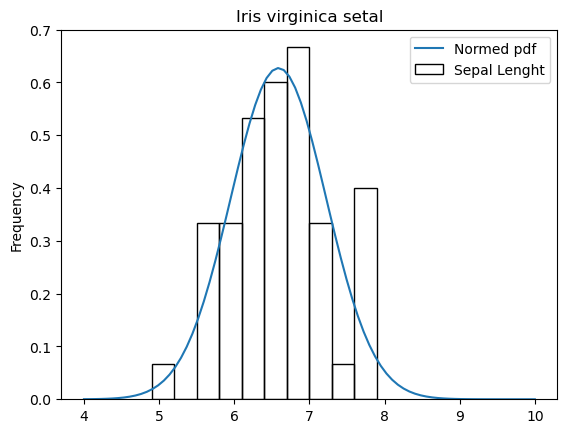

In [13]:
plt.plot(x, stats.norm.pdf(x,mean,std), linestyle='-', label='Normed pdf')
plt.hist(df_v['slength'],fill=False, density=True, color='#073a67', label='Sepal Lenght')
plt.title('Iris virginica setal')
plt.ylabel('Frequency')
plt.legend()

In [14]:
#Calculate 0.95% confidence interval using t distribution
stats.t.interval(0.95,df=len(df_v['slength'])-1, loc=mean,scale=stats.sem(df_v['slength']))

(6.4072850193549105, 6.768714980645086)

In [15]:
#Calculate 0.95% confidence interval using normal distribution
stats.norm.interval(0.95, loc=mean,scale=stats.sem(df_v['slength']))

(6.411746407971008, 6.764253592028989)

In [16]:
alpha=0.05
data=df_v['slength']
degf= len(data)-1
n=len(data)
s=np.var(df_v['slength'], ddof=1)

t=stats.t.ppf(1-alpha/2,degf)

lower=s-t*(s/np.sqrt(n))
upper=s+t*(s/np.sqrt(n))

(lower, upper)

(0.2894298887516621, 0.519255825534052)

In [17]:
# confidence interval for the standard deviation of normally distributed data
alpha = 0.05  # significance level = 5%
n = len(df_v['slength'])  # sample sizes
s = np.var(df_v['slength'], ddof=1)   # sample variance
degf = n - 1                 # degrees of freedom

ki=stats.chi2.ppf(alpha/2,degf)

upper = np.sqrt((n - 1) * s / stats.chi2.ppf(alpha / 2, degf))
lower = np.sqrt((n - 1) * s / stats.chi2.ppf(1 - alpha / 2, degf))

(lower, upper)


(0.5311718507243312, 0.7923907741872332)

In [18]:
df_s=df.loc[df['species']=='Iris-setosa']
df_ve=df.loc[df['species']=='Iris-versicolor']

In [19]:
# confidence interval for the standard deviation of normally distributed data
alpha = 0.05  # significance level = 5%
n = len(df_s['slength'])  # sample sizes
s = np.var(df_s['slength'], ddof=1)   # sample variance
degf = n - 1                 # degrees of freedom

upper = np.sqrt((n - 1) * s / stats.chi2.ppf(alpha / 2, degf))
lower = np.sqrt((n - 1) * s / stats.chi2.ppf(1 - alpha / 2, degf))

(lower, upper)

(0.2944466240129897, 0.43924915832853006)

In [20]:
# confidence interval for the standard deviation of normally distributed data
alpha = 0.05  # significance level = 5%
n = len(df_ve['slength'])  # sample sizes
s = np.var(df_ve['slength'], ddof=1)   # sample variance
degf = n - 1                 # degrees of freedom

upper = np.sqrt((n - 1) * s / stats.chi2.ppf(alpha / 2, degf))
lower = np.sqrt((n - 1) * s / stats.chi2.ppf(1 - alpha / 2, degf))

(lower, upper)

(0.43117531428325767, 0.643218085878292)

In [21]:
from statsmodels.base.model import Model
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [22]:
x=df_s['slength']
y=df_s['swidth']

In [23]:
X2=sm.add_constant(x)
est=sm.OLS(y,X2)  #OLS=Ordinary least squres
model=est.fit()
print(model.params)

const     -0.623012
slength    0.807234
dtype: float64


In [24]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 swidth   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.52
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           4.75e-10
Time:                        11:04:10   Log-Likelihood:                -1.8042
No. Observations:                  50   AIC:                             7.608
Df Residuals:                      48   BIC:                             11.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6230      0.521     -1.196      0.2

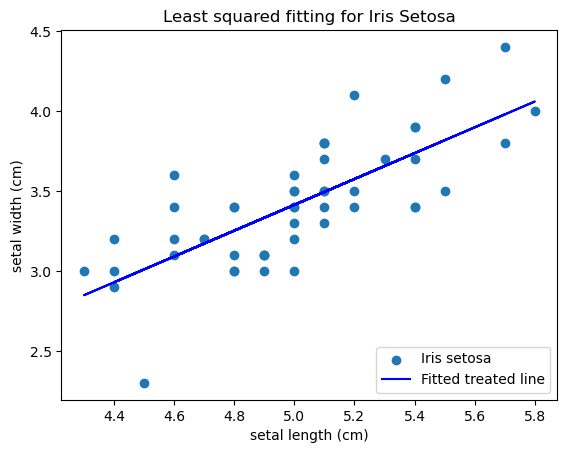

In [25]:
intercept, slope=model.params
plt.scatter(df_s['slength'], df_s['swidth'],label='Iris setosa')
plt.plot(x,intercept+slope*x,'b',label='Fitted treated line')
plt.xlabel('setal length (cm)')
plt.ylabel('setal width (cm)')
plt.title('Least squared fitting for Iris Setosa')
plt.legend(loc='lower right')
plt.show()

const      1.446305
slength    0.231890
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 swidth   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.193
Method:                 Least Squares   F-statistic:                     12.69
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           0.000843
Time:                        11:04:10   Log-Likelihood:                -7.9955
No. Observations:                  50   AIC:                             19.99
Df Residuals:                      48   BIC:                             23.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

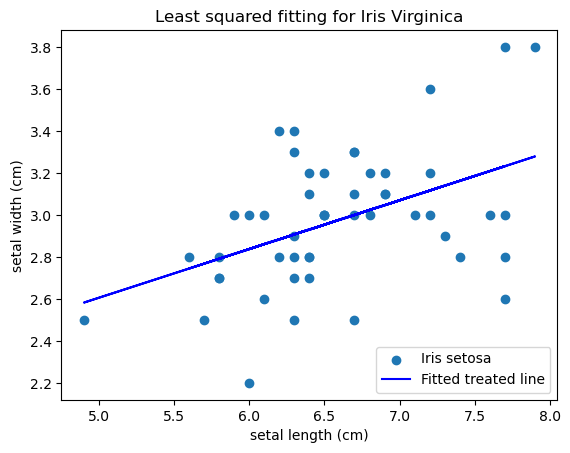

In [26]:
x=df_v['slength']
y=df_v['swidth']

X2=sm.add_constant(x)
est=sm.OLS(y,X2)  #OLS=Ordinary least squres
model=est.fit()
print(model.params)

print(model.summary())

intercept, slope=model.params
plt.scatter(df_v['slength'], df_v['swidth'],label='Iris setosa')
plt.plot(x,intercept+slope*x,'b',label='Fitted treated line')
plt.xlabel('setal length (cm)')
plt.ylabel('setal width (cm)')
plt.title('Least squared fitting for Iris Virginica')
plt.legend(loc='lower right')
plt.show()

const      0.872146
slength    0.319719
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                 swidth   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     18.35
Date:                Tue, 05 Sep 2023   Prob (F-statistic):           8.77e-05
Time:                        11:04:11   Log-Likelihood:                -4.3974
No. Observations:                  50   AIC:                             12.79
Df Residuals:                      48   BIC:                             16.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

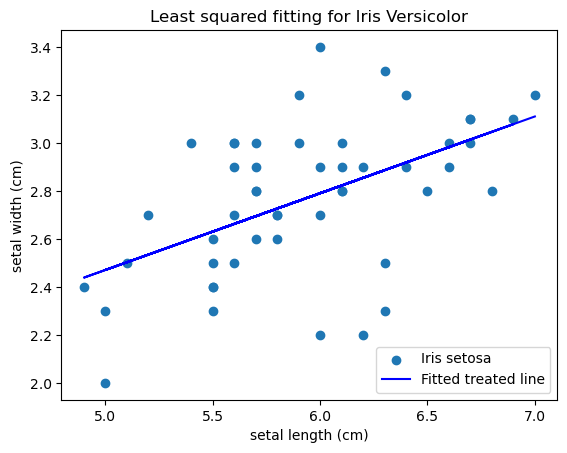

In [27]:
x=df_ve['slength']
y=df_ve['swidth']

X2=sm.add_constant(x)
est=sm.OLS(y,X2)  #OLS=Ordinary least squres
model=est.fit()
print(model.params)

print(model.summary())

intercept, slope=model.params
plt.scatter(df_ve['slength'], df_ve['swidth'],label='Iris setosa')
plt.plot(x,intercept+slope*x,'b',label='Fitted treated line')
plt.xlabel('setal length (cm)')
plt.ylabel('setal width (cm)')
plt.title('Least squared fitting for Iris Versicolor')
plt.legend(loc='lower right')
plt.show()

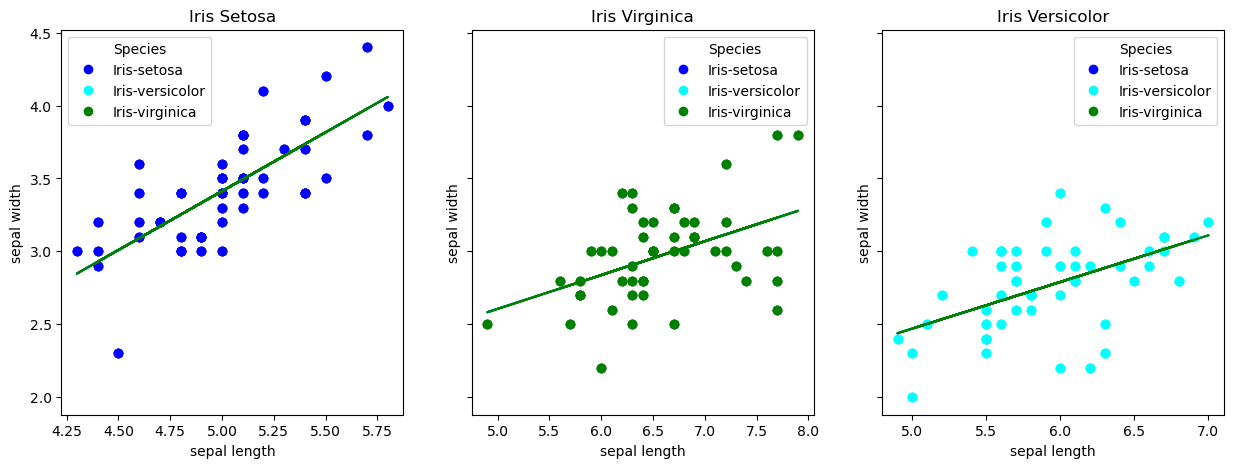

In [28]:
from matplotlib.lines import Line2D

colors = {'Iris-setosa': 'blue', 'Iris-versicolor': 'cyan', 'Iris-virginica': 'green'}

data_to_plot = [
    {'species': 'Iris-setosa','x': 'slength', 'y': 'swidth', 'title': 'Iris Setosa'},
    {'species': 'Iris-virginica','x': 'slength', 'y': 'swidth', 'title': 'Iris Virginica'},
    {'species': 'Iris-versicolor','x': 'slength', 'y': 'swidth', 'title': 'Iris Versicolor'}
]

fig, axs=plt.subplots(1, len(data_to_plot), figsize=(15, 5), sharey=True)

for i, plot_data in enumerate(data_to_plot):
    x_column=plot_data['x']
    y_column=plot_data['y']
    title = plot_data['title']
    species_to_plot = plot_data['species']
    
    for species, color in colors.items():
        subset = df[df['species'] == species_to_plot]
        axs[i].scatter(subset[x_column], subset[y_column], c=colors[species_to_plot], label=species_to_plot)
        x = sm.add_constant(subset[x_column])
        model = sm.OLS(subset[y_column], x).fit()
        axs[i].plot(subset[x_column], model.predict(x), color=color)

        
    axs[i].set_xlabel('sepal length')
    axs[i].set_ylabel('sepal width')
    axs[i].set_title(title)
    
     # Add a custom legend
    custom_legend = [Line2D([0], [0], marker='o', color='w', label=label, 
                            markerfacecolor=color, markersize=8) for label, color in colors.items()]
    axs[i].legend(handles=custom_legend, title='Species')

    
plt.show()  

In [32]:
import seaborn as sns
import statsmodels.api as sm

Text(0.5, 1.0, 'Residual plot for Iris setosa slength vs swidth')

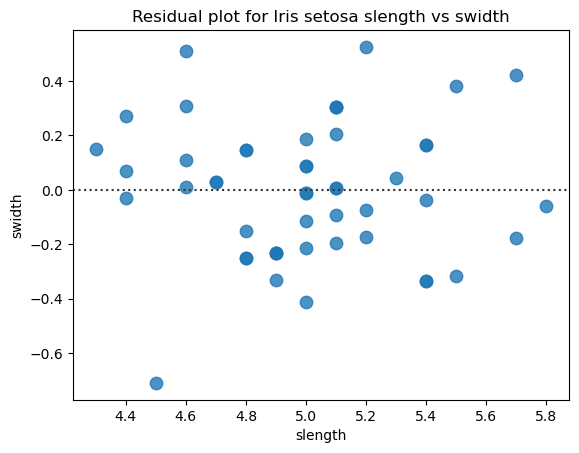

In [40]:
sns.residplot(x="slength", y="swidth", data=df_s,
              scatter_kws={"s": 80});
plt.title('Residual plot for Iris setosa slength vs swidth')

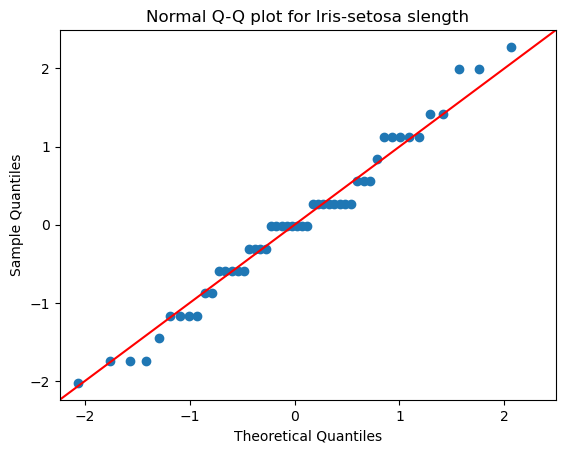

In [39]:
test = np.random.normal(0,1, 1000)
data=df_s['slength']
sm.qqplot(data,fit=True, line='45')
plt.title('Normal Q-Q plot for Iris-setosa slength')
plt.show()

### Calculate Cook's distance
link: https://www.statology.org/cooks-distance-python/

In [44]:
x=df_s['slength']
y=df_s['swidth'] #define x and y variable

In [45]:
x=sm.add_constant(x) #add constant to predictor variables

In [46]:
model=sm.OLS(y,x).fit() #fit linear regression model

In [47]:
np.set_printoptions(suppress=True) #suppress scientific notation

In [48]:
influence=model.get_influence()    #create instance of influence

In [50]:
cooks=influence.cooks_distance  #obtain cook's distance for each observation

In [51]:
print(cooks)

(array([0.0000064 , 0.01924556, 0.00024413, 0.00003749, 0.00554678,
       0.01023843, 0.03793405, 0.0000275 , 0.00060145, 0.00940845,
       0.00049502, 0.00477783, 0.01376596, 0.02222762, 0.00426223,
       0.16569835, 0.01023843, 0.0000064 , 0.02958423, 0.01601205,
       0.0430149 , 0.00725945, 0.10273905, 0.00642287, 0.00477783,
       0.02712157, 0.0000275 , 0.00117202, 0.00641982, 0.00024413,
       0.00500073, 0.0430149 , 0.05812891, 0.07618357, 0.00940845,
       0.0072191 , 0.05205322, 0.00940845, 0.00367011, 0.00150595,
       0.00119828, 0.27086021, 0.05326557, 0.00119828, 0.01601205,
       0.01376596, 0.01601205, 0.00476155, 0.00055807, 0.00203444]), array([0.9999936 , 0.98094602, 0.9997559 , 0.99996251, 0.99446921,
       0.98981596, 0.96280526, 0.9999725 , 0.99939874, 0.99063749,
       0.99950511, 0.99523404, 0.98633225, 0.97802765, 0.99574722,
       0.84778436, 0.98981596, 0.9999936 , 0.97086679, 0.98412072,
       0.957934  , 0.99276793, 0.9025603 , 0.99359857, 0.99

<function matplotlib.pyplot.show(close=None, block=None)>

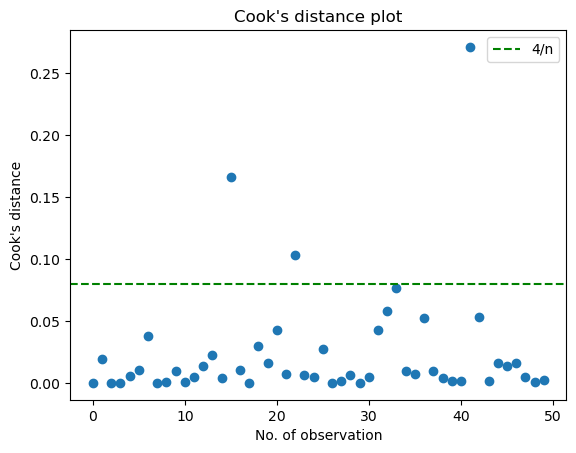

In [70]:
n=len(df_s['slength'])
threshold=4/n
plt.scatter(df_s.index,cooks[0])
plt.xlabel('No. of observation')
plt.ylabel("Cook's distance")
plt.axhline(y = threshold, color ="green", linestyle ="--", label='4/n')
plt.title("Cook's distance plot")
plt.legend()
plt.show

### Exponential diustribution

In [74]:
x=stats.expon.rvs(0.0,0.5,size=50)
#rvs(loc=0, scale=1, size=1, random_state=None)

Location = 0.00, Scale = 0.55


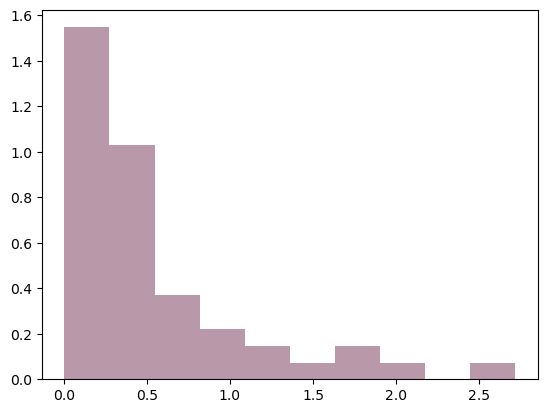

In [79]:
plt.hist(x, density=True, color='#743554', alpha=0.5, histtype='stepfilled' )
loc,scale=stats.expon.fit(x)
print('Location = %1.2f, Scale = %1.2f'%(loc, scale))

In [80]:
from scipy.optimize import curve_fit

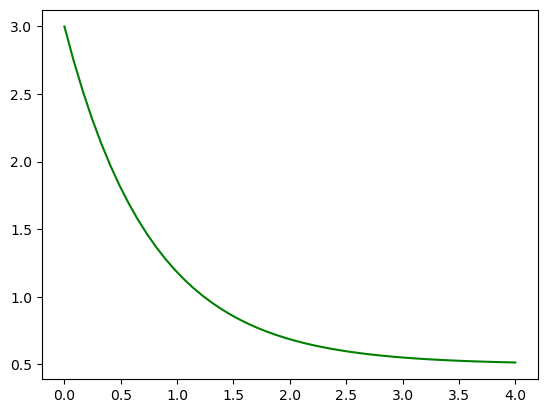

In [102]:
def func(x,a,b,c):
    return a*np.exp(-b*x)+c #custom equation t compute my x data in y data

xdata=np.linspace(0,4,50)
y=func(xdata,2.5,1.3,0.5)
plt.plot(xdata,y,color='g', linestyle='-', label='Generated data')

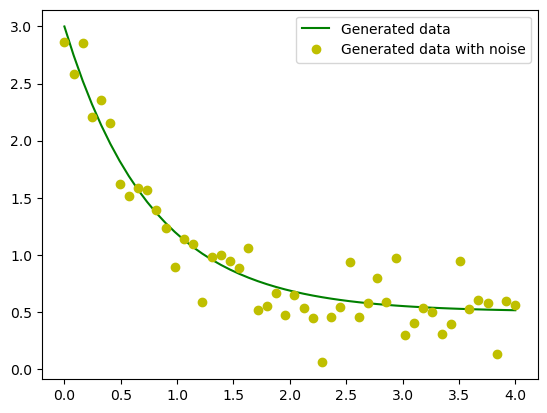

In [101]:
xdata=np.linspace(0,4,50)
y=func(xdata,2.5,1.3,0.5)
plt.plot(xdata,y,color='g', linestyle='-', label='Generated data')

np.random.seed(1729)  #just to have the same chart that she has with np.random.normal in the next line
y_noise=0.2*np.random.normal(size=xdata.size)
ydata=y+y_noise
plt.plot(xdata, ydata,'yo', label='Generated data with noise')
plt.legend()
plt.show()

In [104]:
popt, pcov=curve_fit(func, xdata, ydata)   #curve_fit function is used for nonlinear least-squares curve fitting
print(popt) #popt is an array of the optimal values for the parameters of the model function
print(pcov) #pcov is the covariance matrix of the estimated parameter values

[2.55423706 1.35190947 0.47450618]
[[ 0.0158905   0.00681778 -0.0007614 ]
 [ 0.00681778  0.02019919  0.00541905]
 [-0.0007614   0.00541905  0.00282595]]


In [105]:
perr=np.sqrt(np.diag(pcov)) 
#perr:standard error of the corresponding parameter estimated by the curve_fit function
#np.diag(pcov): take the diagonal of the covariance array where each element is vs itself to evaluate the single element variance

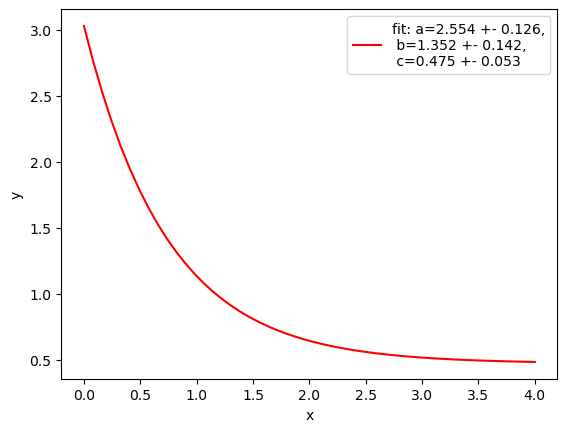

array([0.12605755, 0.14212384, 0.05315968])

In [109]:
plt.plot(xdata,func(xdata,*popt), 'r-', 
        label=f'fit: a={popt[0]:.3f} +- {perr[0]:.3f},\n b={popt[1]:.3f} +- {perr[1]:.3f},\n c={popt[2]:.3f} +- {perr[2]:.3f}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper right')
plt.show()
perr

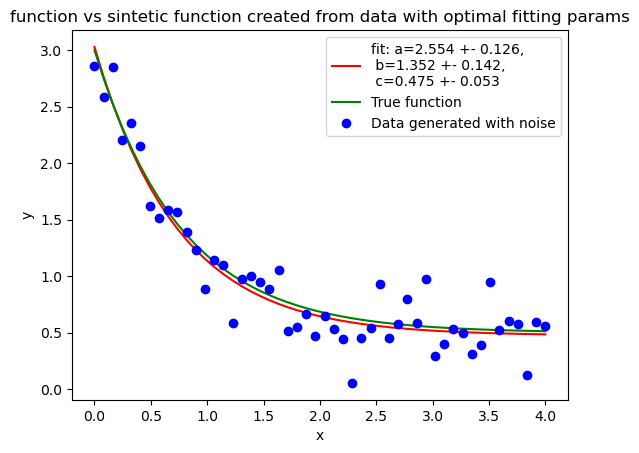

In [111]:
plt.plot(xdata,func(xdata,*popt), 'r-', 
        label=f'fit: a={popt[0]:.3f} +- {perr[0]:.3f},\n b={popt[1]:.3f} +- {perr[1]:.3f},\n c={popt[2]:.3f} +- {perr[2]:.3f}')
plt.xlabel('x')
plt.ylabel('y')

plt.plot(xdata,y,'g-', label='True function')
plt.plot(xdata,ydata,'bo', label='Data generated with noise')

plt.legend(loc='upper right')
plt.title('function vs sintetic function created from data with optimal fitting params')
plt.show()

In general, given a set of observations \((x_i,y_i)\), with \(x_i = (x_{i1}, \ldots, x_{ip})^T \in \R^p\). We assume there exists a function \(f(x)\) such that:
\[y_i = f(x_i) + \epsilon_i\]

with \(\epsilon_i \in\R\) such that \(E(\epsilon) = 0\). This function, however, is not accessible. So we will consider the function \(\hat{f}\) such that:
\[\hat{f}(x) = \argmin_f \left( y_i - f(x_i) \right)^2\]

The various methods presented here consists in numerical approximations finding the minimum in a part of the function space. The most general method offered by this module is called the local-polynomial smoother. It uses the Taylor-decomposition of the function f on each point, and a local weigthing of the points, to find the values. The function is then defined as:
\[\hat{f}_n(x) = \argmin_{a_0} \sum_i K\left(\frac{x-x_i}{h}\right) \left(y_i - \mathcal{P}_n(x_i)\right)^2\]

Where \(\mathcal{P}_n\) is a polynomial of order \(n\) whose constant term is \(a_0\), \(K\) is a kernel used for weighing the values and \(h\) is the selected bandwidth. In particular, in 1D:
\[\hat{f}_n(x) = \argmin_{a_0} \sum_i K\left(\frac{x-x_i}{h}\right) \left(y_i - a_0 - a_1(x-x_i) - \ldots - a_n\frac{(x-x_i)^n}{n!}\right)^2\]

In general, higher polynomials will reduce the error term but will overfit the data, in particular at the boundaries.

In [112]:
def f(x):
    return 3*np.cos(x/2)+x**2/5+3

In [113]:
xs=np.random.rand(200)*10
xy=f(xs)+2*np.random.randn(*xs.shape)

Text(0.5, 1.0, 'Generated data')

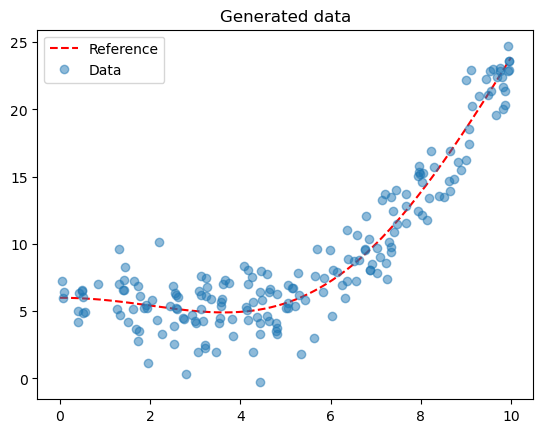

In [114]:
grid=np.r_[0:10:512j]
plt.plot(grid, f(grid), 'r--', label='Reference')
plt.plot(xs,xy, 'o', alpha=0.5, label='Data')
plt.legend(loc='best')
plt.title('Generated data')

In [120]:
from platform import python_version

print(python_version())


3.11.4


Not possible to run pyqt_fit on python 3.11, possible only on python 2.7
the rest of the tutorial could not be followed. 

Original website: https://pythonhosted.org/PyQt-Fit/NonParam_tut.html

### Fitting with scikit-learn

In [121]:
def get_linear(n_d=1, n_points=10, w=None, b=None, sigma=5):
    x = np.random.uniform(0,10, size=(n_points, n_d))
    w= w or np.random.uniform(0.1,10,n_d)
    b= b or np.random.uniform(-10,10)
    y=np.dot(x,w)+b+np.random.normal(0,sigma,size=n_points)
    
    print('true w=', w, 'b=', b)
    
    return x,y

true w= [2.76197925] b= 8.395835923319957


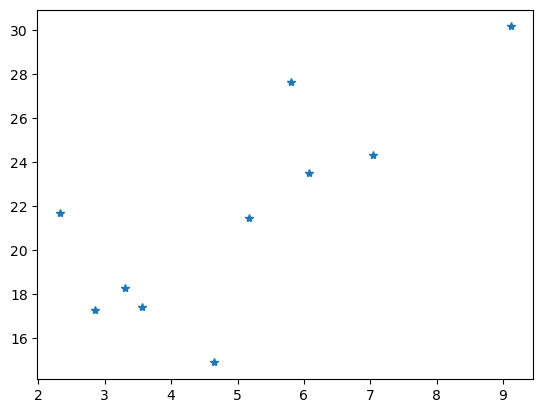

In [123]:
x,y=get_linear(n_d=1,n_points=10)  #generated a linear dataset with some noise in it
plt.plot(x[:,0],y,'*')

In [124]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [125]:
w, w0=reg.coef_, reg.intercept_
print(w,w0)

[1.77839593] 12.795535470499118


In [126]:
np.std(y-reg.predict(x))   #calculate the standard deviation of the residuals in a linear regression model

2.9603499907671806

np.std(y - reg.predict(x)) essentially gives you a measure of the variability or scatter of the residuals in your linear regression model. This value can be used to assess the goodness of fit of the model. A lower standard deviation of residuals indicates that the model's predictions are closer to the actual data points, suggesting a better fit, while a higher standard deviation of residuals indicates greater dispersion and potentially a less accurate fit.

In [127]:
(np.cov(y-reg.predict(x)))**0.5

3.120482880694241

(np.cov(y - reg.predict(x)))**0.5 calculates the standard deviation of the residuals in a linear regression model. It provides a measure of the overall dispersion or spread of the residuals and can be used to assess the goodness of fit of the model. Smaller values indicate that the model's predictions are closer to the actual data points, while larger values indicate greater dispersion and potentially a less accurate fit

In [128]:
from sklearn.metrics import mean_squared_error, r2_score

In [130]:
print('score %.2f' % reg.score(x,y))
print('coefficient of determination: %.2f'% r2_score(y,reg.predict(x)))

score 0.59
coefficient of determination: 0.59


Text(0.5, 1.0, 'fitted model with plus minus one standard deviation')

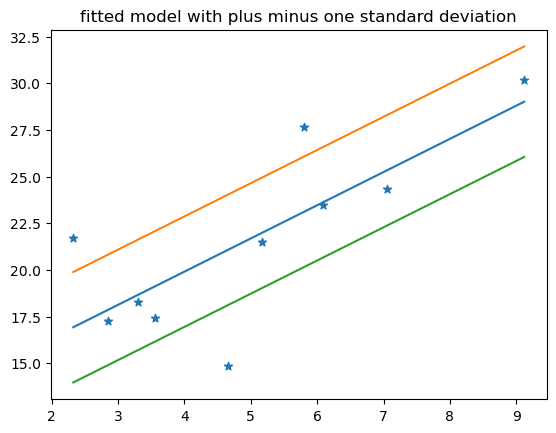

In [134]:
plt.scatter(x,y,marker='*')
x_f=np.linspace(x.min(), x.max(), 10)
y_f=w0+w[0]*x_f
plt.plot(x_f, y_f)
plt.plot(x_f, y_f+2.96)
plt.plot(x_f, y_f-2.96)
plt.title('fitted model with plus minus one standard deviation')

true w= [6.89343923 5.73160458] b= -2.9141076372305807


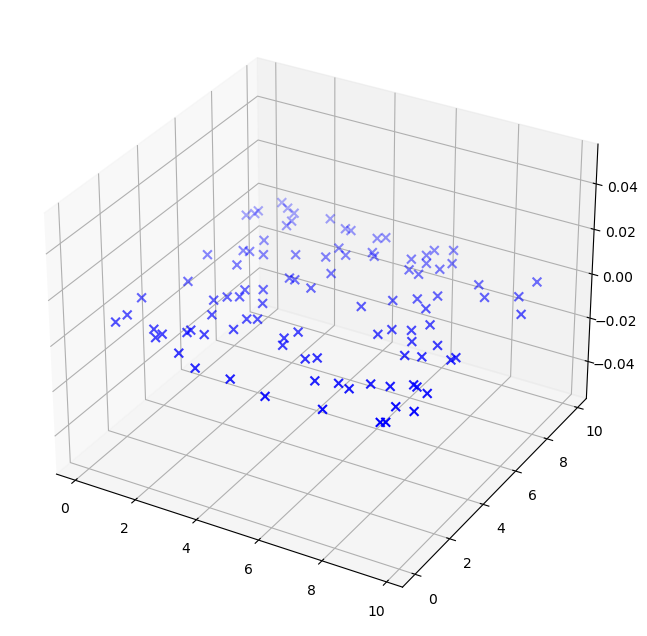

In [138]:
n_d=2
x,y=get_linear(n_d=n_d, n_points=100)

fig=plt.figure(figsize=(8,8))
axs=fig.add_subplot(111,projection='3d')
axs.scatter(x[:,0], x[:,1],marker='x', color='b', s=40)

In [139]:
reg=linear_model.LinearRegression()
reg.fit(x,y)

LinearRegression()

In [140]:
from sklearn.model_selection import train_test_split

true w= [2.37286683 9.66406993] b= 0.22076759977973026


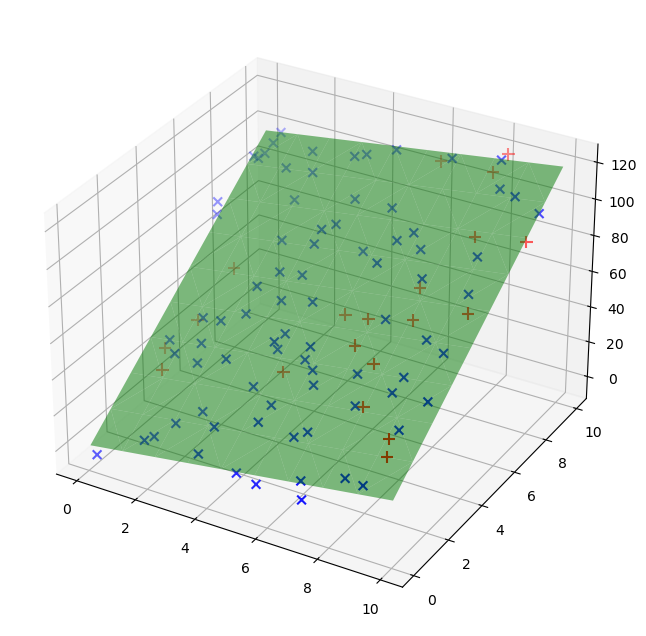

In [150]:
n_d=2

x,y=get_linear(n_d=n_d, n_points=100,sigma=5)

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111, projection='3d')
ax.scatter(x_train[:,0], x_train[:,1], y_train, marker='x', color='blue', s=40)
ax.scatter(x_test[:,0], x_test[:,1], y_test, marker='+', color='r', s=80)

xx0=np.linspace(x[:,0].min(), x[:,0].max(), 10)
xx1=np.linspace(x[:,1].min(), x[:,1].max(), 10)
xx0, xx1=[a.flatten() for a in np.meshgrid(xx0,xx1)]
xx=np.stack((xx0, xx1), axis=-1)
yy=reg.predict(xx)

ax.plot_trisurf(xx0, xx1, yy, alpha=0.5, color='g');


In [151]:
print('Score: %.2f'%reg.score(x,y))
print('Standard deviation of error: %.2f'%np.std(y-reg.predict(x)))

Score: 0.98
Standard deviation of error: 4.69


### Additional example

In [ ]:
url = "https://raw.githubusercontent.com/krishnaik06/Multiple-Linear-Regression/master/50_Startups.csv"
ds = pd.read_csv(url)
ds.head()

x=ds.iloc[:,0:4]
y=ds.iloc[:,4]

states=pd.get_dummies(X['State'],drop_first=True) #give a boolean mask, the folloowing steps do not work
X=X.drop('State',axis=1)
X=pd.concat([X,states],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

In [200]:
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [201]:
print(ds.isnull().sum())

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64
